In [1]:
import torch
from torch import Tensor, nn
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.insert(1, '/work/nlp-project')
from scripts.read_write_data import load_data

In [2]:
# models
EXPERIMENT1_PATH = "/work/nlp-project/models/Baseline.pt"
EXPERIMENT2_PATH = "/work/nlp-project/models/Experiment2.pt"
EXPERIMENT3_PATH = "/work/nlp-project/models/Experiment3.pt"
EXPERIMENT4_PATH = "/work/nlp-project/models/Experiment4.pt"

# test data
TEST_SET_PATH = "/work/nlp-project/data/processed/test.conll"
test_docs, test_labels, test_bio, test_domain = load_data(TEST_SET_PATH)

Getting train, dev and test scores:

In [3]:
e1_model = torch.load(EXPERIMENT1_PATH)
e2_model = torch.load(EXPERIMENT2_PATH)
e3_model = torch.load(EXPERIMENT3_PATH)
e4_model = torch.load(EXPERIMENT4_PATH)

In [4]:
e1_errors = e1_model.evaluate(test_docs, test_labels, test_bio, test_domain)
e2_errors = e2_model.evaluate(test_docs, test_labels, test_bio, test_domain)
e3_errors = e3_model.evaluate(test_docs, test_labels, test_bio, test_domain)
e4_errors = e4_model.evaluate(test_docs, test_labels, test_bio, test_domain)

F1: 0.682 precision: 0.730 recall: 0.641
Metrics: 1304 ACT, 1486 POS, 952 COR, 440 INC (223 PAR, 311 MIS, 129 SPU)
F1: 0.675 precision: 0.720 recall: 0.636
Metrics: 1313 ACT, 1486 POS, 945 COR, 447 INC (231 PAR, 310 MIS, 137 SPU)
F1: 0.656 precision: 0.714 recall: 0.608
Metrics: 1265 ACT, 1486 POS, 903 COR, 425 INC (260 PAR, 323 MIS, 102 SPU)
F1: 0.653 precision: 0.684 recall: 0.624
Metrics: 1355 ACT, 1486 POS, 927 COR, 427 INC (280 PAR, 279 MIS, 148 SPU)


In [5]:
e1_errors.head()

,error_type,entity,entity_BIO,sentence,sentence_BIO,domain
0,PAR,Carter 's Tabas,"[B-PER, I-PER, B-LOC]","[But, for, those, of, you, tempted, in, that, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, B-PER,...",weblogs
1,PAR,Pervez Musharraf,"[B-PER, I-PER]","[But, in, fall, of, 1999, ,, Gen., Pervez, Mus...","[O, O, O, O, O, O, O, B-PER, I-PER, O, O, O, O...",weblogs
2,SPU,Ops,[O],"[Clinton, had, worked, out, a, deal, with, Pak...","[B-PER, O, O, O, O, O, O, B-LOCderiv, O, O, B-...",weblogs
3,MIS,Qandahar,[B-LOC],"[Clinton, had, worked, out, a, deal, with, Pak...","[B-PER, O, O, O, O, O, O, B-LOCderiv, O, O, B-...",weblogs
4,PAR,George Tenet 's,"[B-PER, I-PER, I-PER]","[Dick, could, never, thereafter, get, any, rea...","[B-PER, O, O, O, O, O, O, O, O, O, O, O, O, O,...",weblogs


In [6]:
replacement = {
    'B-PER': 'PER',
    'I-PER': 'PER',
    'B-LOC': 'LOC',
    'O': 'O',
    'B-MISC': 'MISC',
    'B-ORG': 'ORG',
    'I-ORG': 'ORG',
    'I-LOC': 'LOC',
    'B-LOCderiv': 'MISC',
    'I-MISC': 'MISC',
    'B-LOCpart': 'LOC',
    'B-ORGpart': 'ORG',
    'B-MISCpart': 'MISC',
    'I-MISCpart': 'MISC',
    'I-LOCpart': 'LOC',
    'B-PERpart': 'PER',
    'B-ORGderiv': 'ORG'
}

e1_errors["general_BIO"] = e1_errors.explode("entity_BIO").replace(to_replace=replacement).pipe(lambda df_: df_[~df_.index.duplicated(keep='first')]).entity_BIO
e2_errors["general_BIO"] = e2_errors.explode("entity_BIO").replace(to_replace=replacement).pipe(lambda df_: df_[~df_.index.duplicated(keep='first')]).entity_BIO
e3_errors["general_BIO"] = e3_errors.explode("entity_BIO").replace(to_replace=replacement).pipe(lambda df_: df_[~df_.index.duplicated(keep='first')]).entity_BIO
e4_errors["general_BIO"] = e4_errors.explode("entity_BIO").replace(to_replace=replacement).pipe(lambda df_: df_[~df_.index.duplicated(keep='first')]).entity_BIO


In [7]:
e1_errors

,error_type,entity,entity_BIO,sentence,sentence_BIO,domain,general_BIO
0,PAR,Carter 's Tabas,"[B-PER, I-PER, B-LOC]","[But, for, those, of, you, tempted, in, that, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, B-PER,...",weblogs,PER
1,PAR,Pervez Musharraf,"[B-PER, I-PER]","[But, in, fall, of, 1999, ,, Gen., Pervez, Mus...","[O, O, O, O, O, O, O, B-PER, I-PER, O, O, O, O...",weblogs,PER
2,SPU,Ops,[O],"[Clinton, had, worked, out, a, deal, with, Pak...","[B-PER, O, O, O, O, O, O, B-LOCderiv, O, O, B-...",weblogs,O
3,MIS,Qandahar,[B-LOC],"[Clinton, had, worked, out, a, deal, with, Pak...","[B-PER, O, O, O, O, O, O, B-LOCderiv, O, O, B-...",weblogs,LOC
4,PAR,George Tenet 's,"[B-PER, I-PER, I-PER]","[Dick, could, never, thereafter, get, any, rea...","[B-PER, O, O, O, O, O, O, O, O, O, O, O, O, O,...",weblogs,PER
...,...,...,...,...,...,...,...
621,SPU,Green,[O],"[Green, tea]","[O, O]",answers,O
622,SPU,Green Tea,"[O, O]","[Green, Tea, .]","[O, O, O]",answers,O
623,SPU,Green,[O],[Green],[O],answers,O
624,SPU,White Tea,"[O, O]","[Green, Tea, Or, White, Tea, ?]","[O, O, O, O, O, O]",answers,O


In [8]:
e1_err = e1_errors.groupby("error_type").count().entity.to_dict()
e2_err = e2_errors.groupby("error_type").count().entity.to_dict()
e3_err = e3_errors.groupby("error_type").count().entity.to_dict()
e4_err = e4_errors.groupby("error_type").count().entity.to_dict()

errors = {}
for (e1, e1_val), (e2, e2_val), (e3, e3_val),(e4, e4_val) in zip(e1_err.items(), e2_err.items(), e3_err.items(), e4_err.items()):
    errors[e1] = [e1_val, e2_val, e3_val, e4_val]

In [9]:
errors

{'MIS': [311, 310, 323, 279],
 'PAR': [223, 231, 260, 280],
 'SPU': [92, 96, 88, 111]}

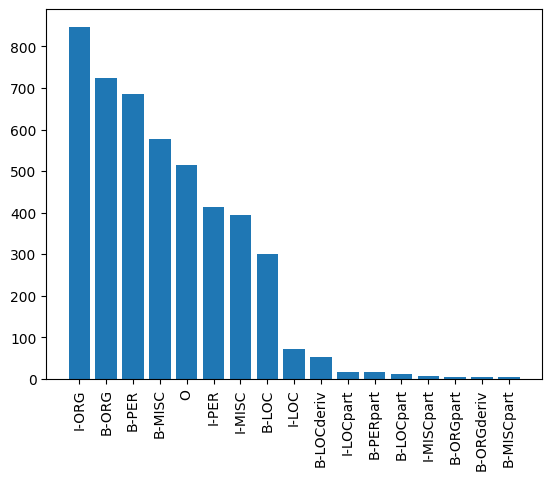

In [10]:
all_bio_errors = pd.DataFrame(pd.concat([e1_errors['entity_BIO'],e2_errors['entity_BIO'],e3_errors['entity_BIO'],e4_errors['entity_BIO']]).explode())
unique, counts = np.unique(all_bio_errors, return_counts=True)
# arr1inds = arr1.argsort()
# sorted_arr1 = arr1[arr1inds[::-1]]
# sorted_arr2 = arr2[arr1inds[::-1]]
indeces = counts.argsort()
counts=counts[indeces[::-1]]
unique = unique[indeces[::-1]]
# unique.sort()
plt.bar(unique, height=counts)
plt.xticks(rotation=90);

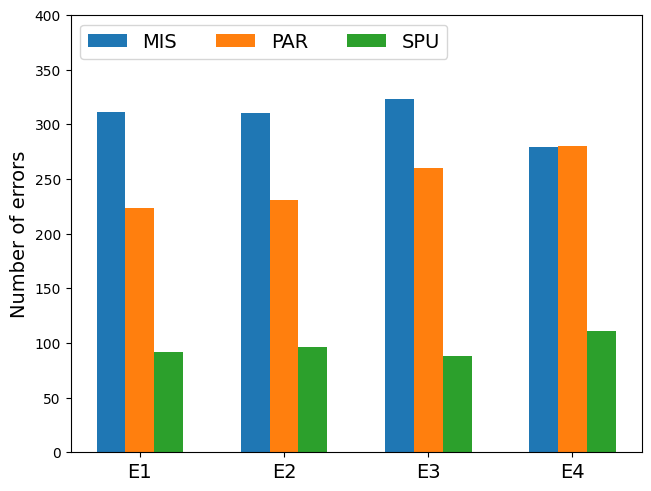

In [25]:
experiments = ("E1", "E2", "E3", "E4")

x = np.arange(len(experiments))  # the label locations
width = 0.2 # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in errors.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of errors', fontsize=14)
# ax.set_title('Error types by experiment')
ax.set_xticks(x + width, experiments, fontsize=14)
ax.legend(loc='upper left', ncols=3, prop={'size': 14})
ax.set_ylim(0, 400)

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b2f14aee-af04-4db5-af55-57a3a58b9f40' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>